<a href="https://colab.research.google.com/github/wonjae124/2021_Lab_project/blob/main/None_batch_normal_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Set Dataset and model

In [ ]:
!pip install pytorch-msssim

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision import datasets, transforms
from torchvision.utils import save_image
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio
from pytorch_msssim import ms_ssim
import time
from torchsummary import summary
import matplotlib.pyplot as plt


In [ ]:
def get_device():
    if torch.cuda.is_available():
        device = 'cuda'
    else:
        device = 'cpu'
    return device


In [ ]:
batch_size = 64
torch.manual_seed(1)
torch.cuda.manual_seed(1)

Original Train/Validation/Test dataset

In [ ]:
org_tr_set = datasets.STL10(root = "./data", split = "unlabeled", transform = transforms.ToTensor(), download=True)
tr_subset, val_subset = torch.utils.data.random_split(org_tr_set,[90000,10000],generator=torch.Generator().manual_seed(1))
test_set = datasets.STL10(root = "./data", split = "test",transform = transforms.ToTensor(), download=True)


  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting ./data/stl10_binary.tar.gz to ./data
Files already downloaded and verified


Strong_hat Train/Validation/Test dataset


# Original / Gaussian Blur DataLoader

In [ ]:
tr_dataloader = DataLoader(tr_subset, batch_size=batch_size, num_workers=0)

val_dataloader = DataLoader(val_subset, batch_size=batch_size, num_workers=0)

test_dataloader = DataLoader(test_set, batch_size=batch_size, num_workers=0)


In [ ]:
print(len(tr_subset),len(val_subset), len(test_set))

90000 10000 8000


In [31]:
class Autoencoder(nn.Module):
   def __init__(self):
       super(Autoencoder, self).__init__()
       self.encoder1 = nn.Sequential(
           # conv 1
           nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, stride=1, padding=2),
           nn.ReLU(),
           nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True),
        )

       self.encoder2 = nn.Sequential(
           # conv 2
           nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2),
           nn.ReLU(),
           nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True),
       )

       self.encoder3 = nn.Sequential(
           # conv 3
           nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=2),
           nn.ReLU(),
           nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True),
       )
           # conv 4
       self.encoder4 = nn.Sequential(
           nn.Conv2d(in_channels=256, out_channels=512, kernel_size=5, stride=1, padding=2),
           nn.ReLU(),
           nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True),
       )
           # conv 5
       self.encoder5 = nn.Sequential(
           nn.Conv2d(in_channels=512, out_channels=128, kernel_size=5, stride=1, padding=2),
           nn.ReLU()
       )

       

       self.decoder1 = nn.Sequential(
           # conv 6
           nn.ConvTranspose2d(in_channels=128, out_channels=512, kernel_size=5, stride=1, padding=2),
           nn.ReLU(),
       )

       self.decoder2 = nn.Sequential(
           # conv 7
           nn.UpsamplingBilinear2d(scale_factor = 2),
           nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=5, stride=1, padding=2),
           nn.ReLU(),
       )

       self.decoder3 = nn.Sequential(
           # conv 8
           nn.UpsamplingBilinear2d(scale_factor = 2),
           nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=5, stride=1, padding=2),
           nn.ReLU(),
       )
       self.decoder4 = nn.Sequential(
           # conv 9
           nn.UpsamplingBilinear2d(scale_factor = 2),         
           nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=5, stride=1, padding=2),
           nn.ReLU(),
       )
           # conv 10 out
       self.decoder5 = nn.Sequential(
           nn.UpsamplingBilinear2d(scale_factor = 2),
           nn.ConvTranspose2d(in_channels=64, out_channels=3, kernel_size=5, stride=1, padding=2),
           nn.Sigmoid()  

           # TODO softmax deprecated
       )

   def forward(self, x):
       x = self.encoder1(x)
       x = self.encoder2(x)
       x = self.encoder3(x)
       x = self.encoder4(x)       
       x = self.encoder5(x)

       x = self.decoder1(x)
       x = self.decoder2(x)
       x = self.decoder3(x)
       x = self.decoder4(x) 
       x = self.decoder5(x)             
       return x

# Model. Setting parameter -> float

cuda
Epoch : [1/300] 

Training Loss: 0.024554	 validation Loss 0.016827
PNSR :13.96 	 SSIM : 0.42
PNSR :16.79 	 SSIM : 0.42
PNSR :17.90 	 SSIM : 0.60
PNSR :22.73 	 SSIM : 0.68
PNSR :14.72 	 SSIM : 0.25


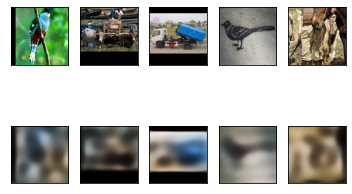

Epoch : [2/300] 

Training Loss: 0.017554	 validation Loss 0.015584
PNSR :14.25 	 SSIM : 0.45
PNSR :16.95 	 SSIM : 0.42
PNSR :18.39 	 SSIM : 0.61
PNSR :23.06 	 SSIM : 0.70
PNSR :15.09 	 SSIM : 0.29


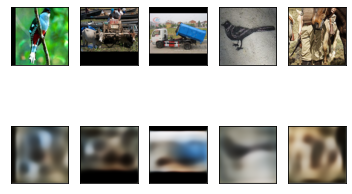

Epoch : [3/300] 

Training Loss: 0.019460	 validation Loss 0.016318
PNSR :14.13 	 SSIM : 0.43
PNSR :16.93 	 SSIM : 0.44
PNSR :18.37 	 SSIM : 0.62
PNSR :23.01 	 SSIM : 0.69
PNSR :14.89 	 SSIM : 0.27


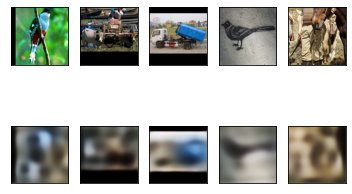

Epoch : [4/300] 

Training Loss: 0.016825	 validation Loss 0.015641
PNSR :14.22 	 SSIM : 0.45
PNSR :16.87 	 SSIM : 0.42
PNSR :18.18 	 SSIM : 0.60
PNSR :23.19 	 SSIM : 0.70
PNSR :15.11 	 SSIM : 0.29


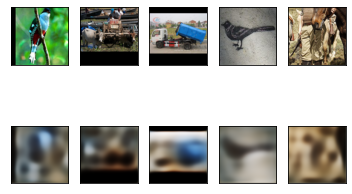

Epoch : [5/300] 

Training Loss: 0.016708	 validation Loss 0.016091
PNSR :14.10 	 SSIM : 0.43
PNSR :16.88 	 SSIM : 0.40
PNSR :17.95 	 SSIM : 0.59
PNSR :22.67 	 SSIM : 0.69
PNSR :14.96 	 SSIM : 0.28


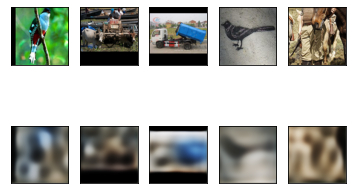

Epoch : [6/300] 

Training Loss: 0.017407	 validation Loss 0.025189
PNSR :13.07 	 SSIM : 0.35
PNSR :15.24 	 SSIM : 0.26
PNSR :15.70 	 SSIM : 0.49
PNSR :19.46 	 SSIM : 0.64
PNSR :13.78 	 SSIM : 0.21


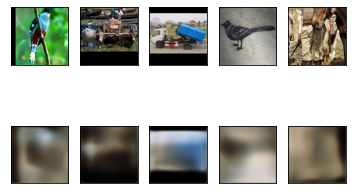

Epoch : [7/300] 

Training Loss: 0.016091	 validation Loss 0.016629
PNSR :14.14 	 SSIM : 0.44
PNSR :16.79 	 SSIM : 0.41
PNSR :17.44 	 SSIM : 0.59
PNSR :22.81 	 SSIM : 0.70
PNSR :15.02 	 SSIM : 0.29


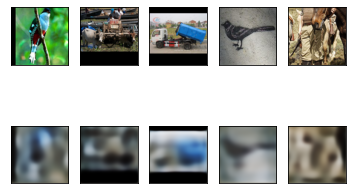

Epoch : [8/300] 

Training Loss: 0.014902	 validation Loss 0.014577
PNSR :14.37 	 SSIM : 0.47
PNSR :17.19 	 SSIM : 0.46
PNSR :18.65 	 SSIM : 0.62
PNSR :23.49 	 SSIM : 0.71
PNSR :15.41 	 SSIM : 0.32


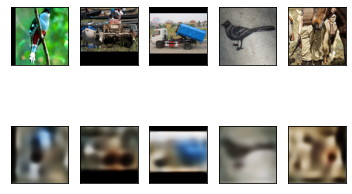

Epoch : [9/300] 

Training Loss: 0.015990	 validation Loss 0.021041
PNSR :14.12 	 SSIM : 0.46
PNSR :16.99 	 SSIM : 0.44
PNSR :16.21 	 SSIM : 0.57
PNSR :19.23 	 SSIM : 0.66
PNSR :14.74 	 SSIM : 0.29


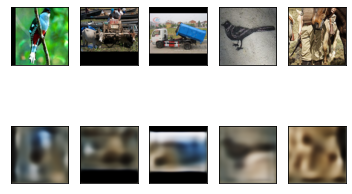

Epoch : [10/300] 

Training Loss: 0.015065	 validation Loss 0.014163
PNSR :14.43 	 SSIM : 0.47
PNSR :17.36 	 SSIM : 0.47
PNSR :18.98 	 SSIM : 0.63
PNSR :23.79 	 SSIM : 0.72
PNSR :15.58 	 SSIM : 0.33


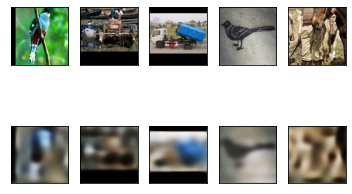

Epoch : [11/300] 

Training Loss: 0.015106	 validation Loss 0.021742
PNSR :13.62 	 SSIM : 0.39
PNSR :16.10 	 SSIM : 0.34
PNSR :16.77 	 SSIM : 0.56
PNSR :20.99 	 SSIM : 0.66
PNSR :14.20 	 SSIM : 0.23


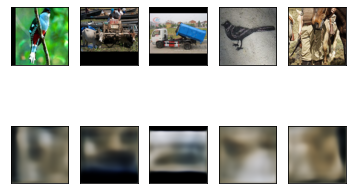

Epoch : [12/300] 

Training Loss: 0.014558	 validation Loss 0.014898
PNSR :14.30 	 SSIM : 0.47
PNSR :17.21 	 SSIM : 0.46
PNSR :18.35 	 SSIM : 0.62
PNSR :22.97 	 SSIM : 0.72
PNSR :15.52 	 SSIM : 0.34


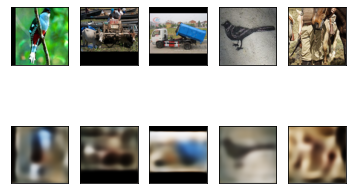

Epoch : [13/300] 

Training Loss: 0.014326	 validation Loss 0.014294
PNSR :14.48 	 SSIM : 0.48
PNSR :17.31 	 SSIM : 0.45
PNSR :19.11 	 SSIM : 0.64
PNSR :23.26 	 SSIM : 0.72
PNSR :15.60 	 SSIM : 0.34


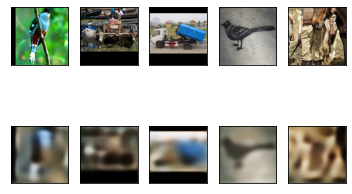

Epoch : [14/300] 

Training Loss: 0.014413	 validation Loss 0.015730
PNSR :14.31 	 SSIM : 0.48
PNSR :17.25 	 SSIM : 0.47
PNSR :17.17 	 SSIM : 0.60
PNSR :22.36 	 SSIM : 0.71
PNSR :15.46 	 SSIM : 0.34


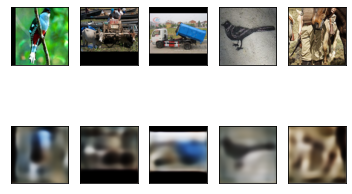

Epoch : [15/300] 

Training Loss: 0.014912	 validation Loss 0.013817
PNSR :14.50 	 SSIM : 0.48
PNSR :17.45 	 SSIM : 0.47
PNSR :18.96 	 SSIM : 0.63
PNSR :23.78 	 SSIM : 0.73
PNSR :15.71 	 SSIM : 0.34


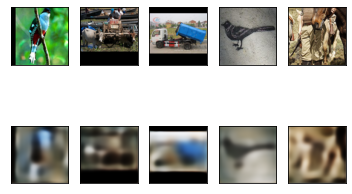

Epoch : [16/300] 

Training Loss: 0.015147	 validation Loss 0.014832
PNSR :14.30 	 SSIM : 0.47
PNSR :17.22 	 SSIM : 0.45
PNSR :18.78 	 SSIM : 0.63
PNSR :23.56 	 SSIM : 0.72
PNSR :15.41 	 SSIM : 0.31


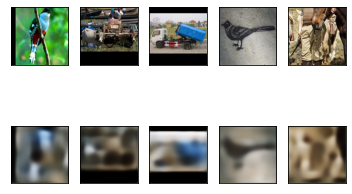

Epoch : [17/300] 

Training Loss: 0.014112	 validation Loss 0.014606
PNSR :14.44 	 SSIM : 0.48
PNSR :17.35 	 SSIM : 0.47
PNSR :18.49 	 SSIM : 0.62
PNSR :23.44 	 SSIM : 0.72
PNSR :15.47 	 SSIM : 0.33


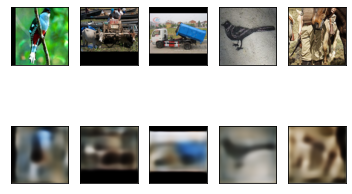

Epoch : [18/300] 

Training Loss: 0.014675	 validation Loss 0.021755
PNSR :13.41 	 SSIM : 0.38
PNSR :16.04 	 SSIM : 0.31
PNSR :16.59 	 SSIM : 0.53
PNSR :20.63 	 SSIM : 0.64
PNSR :14.36 	 SSIM : 0.25


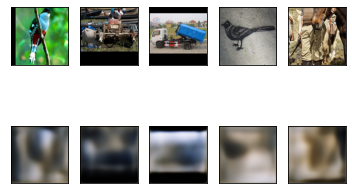

Epoch : [19/300] 

Training Loss: 0.015169	 validation Loss 0.014397
PNSR :14.35 	 SSIM : 0.47
PNSR :17.31 	 SSIM : 0.46
PNSR :18.87 	 SSIM : 0.63
PNSR :23.23 	 SSIM : 0.71
PNSR :15.60 	 SSIM : 0.33


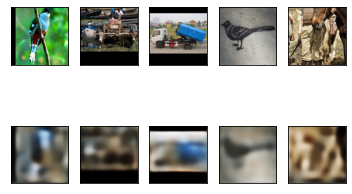

Epoch : [20/300] 

Training Loss: 0.014591	 validation Loss 0.014265
PNSR :14.31 	 SSIM : 0.47
PNSR :17.39 	 SSIM : 0.47
PNSR :18.81 	 SSIM : 0.63
PNSR :23.37 	 SSIM : 0.72
PNSR :15.62 	 SSIM : 0.34


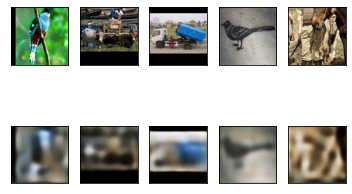

Epoch : [21/300] 

Training Loss: 0.014915	 validation Loss 0.014575
PNSR :14.37 	 SSIM : 0.48
PNSR :17.24 	 SSIM : 0.47
PNSR :18.75 	 SSIM : 0.63
PNSR :23.49 	 SSIM : 0.72
PNSR :15.57 	 SSIM : 0.33


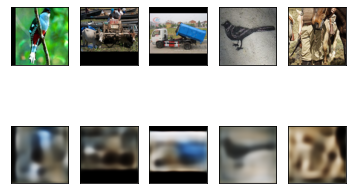

Epoch : [22/300] 

Training Loss: 0.014919	 validation Loss 0.014112
PNSR :14.32 	 SSIM : 0.48
PNSR :17.38 	 SSIM : 0.45
PNSR :18.83 	 SSIM : 0.63
PNSR :23.54 	 SSIM : 0.72
PNSR :15.68 	 SSIM : 0.34


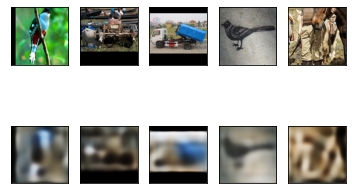

Epoch : [23/300] 

Training Loss: 0.014602	 validation Loss 0.013990
PNSR :14.41 	 SSIM : 0.48
PNSR :17.39 	 SSIM : 0.46
PNSR :19.02 	 SSIM : 0.63
PNSR :23.58 	 SSIM : 0.72
PNSR :15.70 	 SSIM : 0.34


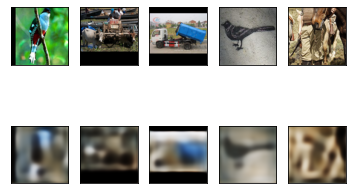

Epoch : [24/300] 

Training Loss: 0.014409	 validation Loss 0.014128
PNSR :14.41 	 SSIM : 0.48
PNSR :17.33 	 SSIM : 0.47
PNSR :19.00 	 SSIM : 0.63
PNSR :23.36 	 SSIM : 0.72
PNSR :15.66 	 SSIM : 0.34


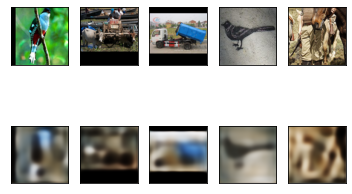

Epoch : [25/300] 

Training Loss: 0.015010	 validation Loss 0.014075
PNSR :14.40 	 SSIM : 0.48
PNSR :17.30 	 SSIM : 0.44
PNSR :18.88 	 SSIM : 0.62
PNSR :23.66 	 SSIM : 0.72
PNSR :15.69 	 SSIM : 0.34


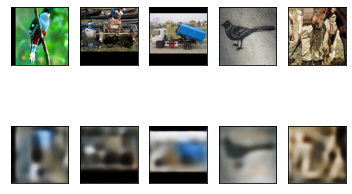

Epoch : [26/300] 

Training Loss: 0.014715	 validation Loss 0.014152
PNSR :14.32 	 SSIM : 0.48
PNSR :17.28 	 SSIM : 0.45
PNSR :18.89 	 SSIM : 0.62
PNSR :23.68 	 SSIM : 0.72
PNSR :15.64 	 SSIM : 0.34


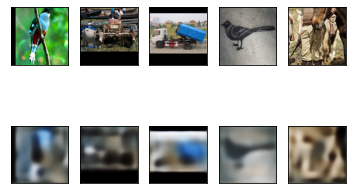

Epoch : [27/300] 

Training Loss: 0.014069	 validation Loss 0.014170
PNSR :14.42 	 SSIM : 0.48
PNSR :17.34 	 SSIM : 0.45
PNSR :18.89 	 SSIM : 0.62
PNSR :23.48 	 SSIM : 0.73
PNSR :15.61 	 SSIM : 0.34


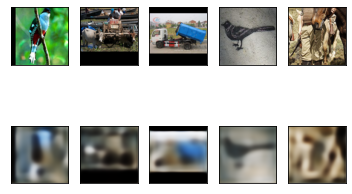

Epoch : [28/300] 

Training Loss: 0.014685	 validation Loss 0.013905
PNSR :14.45 	 SSIM : 0.48
PNSR :17.31 	 SSIM : 0.45
PNSR :19.01 	 SSIM : 0.62
PNSR :23.67 	 SSIM : 0.72
PNSR :15.66 	 SSIM : 0.34


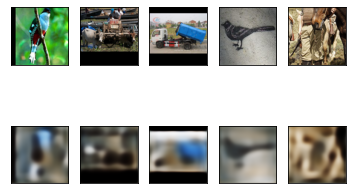

Epoch : [29/300] 

Training Loss: 0.014410	 validation Loss 0.015017
PNSR :14.44 	 SSIM : 0.48
PNSR :17.12 	 SSIM : 0.46
PNSR :18.76 	 SSIM : 0.62
PNSR :22.43 	 SSIM : 0.71
PNSR :15.45 	 SSIM : 0.33


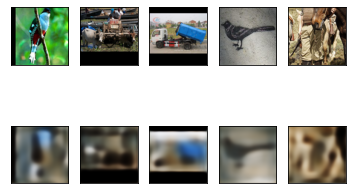

Epoch : [30/300] 

Training Loss: 0.014380	 validation Loss 0.014069
PNSR :14.49 	 SSIM : 0.48
PNSR :17.28 	 SSIM : 0.46
PNSR :19.05 	 SSIM : 0.63
PNSR :23.49 	 SSIM : 0.73
PNSR :15.64 	 SSIM : 0.34


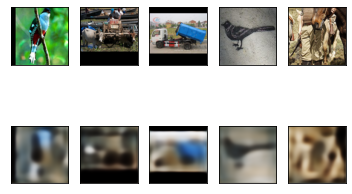

Epoch : [31/300] 

Training Loss: 0.014233	 validation Loss 0.014158
PNSR :14.41 	 SSIM : 0.48
PNSR :17.30 	 SSIM : 0.46
PNSR :18.93 	 SSIM : 0.62
PNSR :23.72 	 SSIM : 0.73
PNSR :15.64 	 SSIM : 0.34


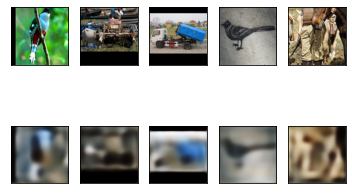

Epoch : [32/300] 

Training Loss: 0.015683	 validation Loss 0.014846
PNSR :14.26 	 SSIM : 0.45
PNSR :17.11 	 SSIM : 0.45
PNSR :18.91 	 SSIM : 0.62
PNSR :23.38 	 SSIM : 0.71
PNSR :15.39 	 SSIM : 0.32


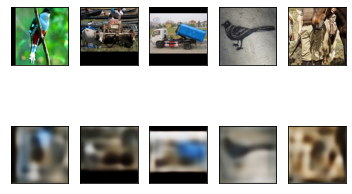

Epoch : [33/300] 

Training Loss: 0.015097	 validation Loss 0.014484
PNSR :14.27 	 SSIM : 0.46
PNSR :17.15 	 SSIM : 0.45
PNSR :18.84 	 SSIM : 0.62
PNSR :23.55 	 SSIM : 0.71
PNSR :15.53 	 SSIM : 0.33


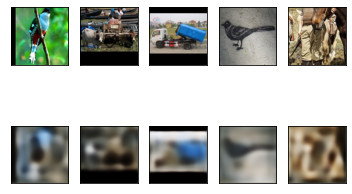

Epoch : [34/300] 

Training Loss: 0.014890	 validation Loss 0.014467
PNSR :14.29 	 SSIM : 0.46
PNSR :17.22 	 SSIM : 0.45
PNSR :18.78 	 SSIM : 0.62
PNSR :23.50 	 SSIM : 0.71
PNSR :15.58 	 SSIM : 0.33


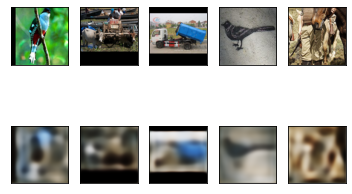

Epoch : [35/300] 

Training Loss: 0.014821	 validation Loss 0.014839
PNSR :14.28 	 SSIM : 0.46
PNSR :17.13 	 SSIM : 0.46
PNSR :18.43 	 SSIM : 0.62
PNSR :22.98 	 SSIM : 0.71
PNSR :15.49 	 SSIM : 0.34


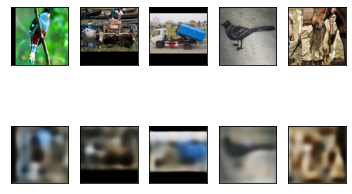

Epoch : [36/300] 

Training Loss: 0.014827	 validation Loss 0.014380
PNSR :14.32 	 SSIM : 0.46
PNSR :17.25 	 SSIM : 0.46
PNSR :18.79 	 SSIM : 0.63
PNSR :23.48 	 SSIM : 0.71
PNSR :15.62 	 SSIM : 0.34


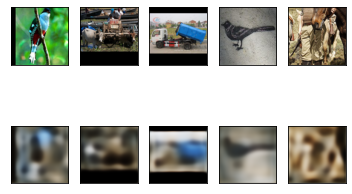

Epoch : [37/300] 

Training Loss: 0.014731	 validation Loss 0.014325
PNSR :14.30 	 SSIM : 0.46
PNSR :17.27 	 SSIM : 0.46
PNSR :18.81 	 SSIM : 0.63
PNSR :23.62 	 SSIM : 0.72
PNSR :15.61 	 SSIM : 0.34


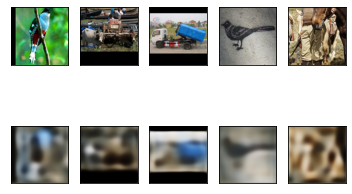

Epoch : [38/300] 

Training Loss: 0.014715	 validation Loss 0.014284
PNSR :14.28 	 SSIM : 0.46
PNSR :17.30 	 SSIM : 0.47
PNSR :18.82 	 SSIM : 0.63
PNSR :23.61 	 SSIM : 0.72
PNSR :15.62 	 SSIM : 0.34


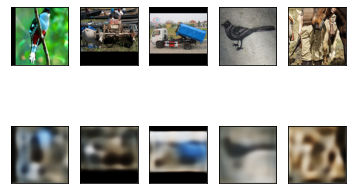

Epoch : [39/300] 

Training Loss: 0.015783	 validation Loss 0.015961
PNSR :14.16 	 SSIM : 0.43
PNSR :16.95 	 SSIM : 0.43
PNSR :18.35 	 SSIM : 0.60
PNSR :22.47 	 SSIM : 0.68
PNSR :15.07 	 SSIM : 0.29


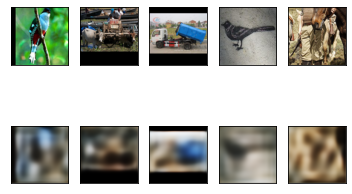

Epoch : [40/300] 

Training Loss: 0.015902	 validation Loss 0.015443
PNSR :14.24 	 SSIM : 0.44
PNSR :17.08 	 SSIM : 0.45
PNSR :18.47 	 SSIM : 0.60
PNSR :22.87 	 SSIM : 0.69
PNSR :15.14 	 SSIM : 0.30


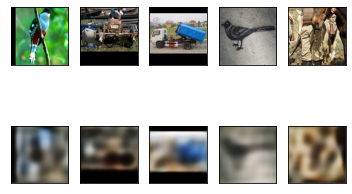

Epoch : [41/300] 



KeyboardInterrupt: ignored

In [32]:
n_epochs = 300

device = get_device()
print(device)

mse_loss_fn = nn.MSELoss().to(device)


model = Autoencoder().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay = 1e-04)

train_loss_graph = np.array([]) # 손실 그래프
val_loss_graph = np.array([])

start = time.time()




for epoch in range(1, n_epochs+1):
    print(f"Epoch : [{epoch}/{n_epochs}]","\n")

    model.train()
    train_loss = 0.0       #훈련 손실값
    total_train_loss = 0.0
    val_loss = 0.0         #검증 손실값
    total_val_loss = 0.0

    #훈련
    for i,(tr_img, _) in enumerate(tr_dataloader):

        tr_img = tr_img.to(torch.device('cuda')) #입력 이미지
        tr_outputs = model(tr_img) #복원 이미지
        optimizer.zero_grad()
        loss = mse_loss_fn(tr_outputs, tr_img)
        #TODO.1) Train() GPU O / val GPU X 학습시간 96분, 검증로스 0.007, 평균 PNSR 25.52/평균 SSIM 0.86
        #TODO.2) Train() GPI X / val GPU X 학습시간 분, 검증로스 , 평균 PNSR/평균 SSIM
        #TODO. 여기에 GPU를 달아두면 성능이 개선되는지 확인 해보기
        #loss = ms_ssim_loss(tr, Y, data_range=255, size_average=False )
        loss.backward()
        optimizer.step()

        train_loss = loss.detach().item()
        total_train_loss += train_loss

    total_train_loss = total_train_loss/len(tr_dataloader) #평균 훈련 손실값
    train_loss_graph = np.append(train_loss_graph, total_train_loss)

    #검증
    model.eval()
    with torch.no_grad():
        optimizer.zero_grad()

        for i, (val_img, _) in enumerate(val_dataloader):
                val_img = val_img.to(torch.device('cuda'))
                val_outputs =model(val_img)
                val_loss = mse_loss_fn(val_outputs, val_img)
                val_loss = val_loss.item()
                total_val_loss += val_loss
        total_val_loss = total_val_loss/len(val_dataloader)
        val_loss_graph = np.append(val_loss_graph, total_val_loss)
        print('Training Loss: {:.6f}\t validation Loss {:.6f}'.format(total_train_loss, total_val_loss))


        if (epoch)%1 == 0:

            for j in range(5):
                val_ssim = ssim(val_img[j].cpu().numpy().transpose(1, 2, 0), val_outputs[j].cpu().numpy().transpose(1, 2, 0), multichannel=True)

                val_psnr = peak_signal_noise_ratio(val_img[j].cpu().numpy().transpose(1,2,0), val_outputs[j].cpu().numpy().transpose(1,2,0))
                print('PNSR :{:.2f} \t SSIM : {:.2f}'.format(val_psnr,val_ssim))

                ax = plt.subplot(2,5,j+1)
                plt.imshow(val_img[j].cpu().numpy().transpose(1, 2, 0))
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(2,5,j+5+1)
                plt.imshow(val_outputs[j].cpu().numpy().transpose(1, 2, 0))
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

            plt.show()

end = time.time()

total_time = (end-start)/60
print("execution time : {:.1f}min".format(total_time))

In [ ]:

# class Autoencoder(nn.Module):  # 잠재벡터 크기 설정(하드 코딩)
#     def __init__(self):
#         super(Autoencoder, self).__init__()
#         in_ch = 32
#         out_ch = 6
#         latent_dim = 32  # TODO. 이미지 크기 말고 채널을 변경해보자. 압축율은 65%, 75%, 85%, 95%등으로 설정하자
#         # TODO. 이미지 압축율을 결정하는 논문(레퍼런스)를 좀 더 찾아보자
#         #
#         latent_img_size_reduce_2 = 2
#         latent_img_size_reduce_4 = 4
#         latent_img_size_reduce_6 = 6
#         latent_img_size_reduce_8 = 8

#         # 96 by 96 by 3
#         self.encoder_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=0)
#         self.downsample_1 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

#         # 47 by 47 by 8

#         self.encoder_2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=2)
#         self.downsample_2 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

#         # 23 by 23 by 16

#         self.encoder_3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
#         self.downsample_3 = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

#         # 11 by 11 by 32
#         # TODO. 레퍼런스에 따라서 배치사이즈 추가 할 수 있으면 해주기(단, sigmoid를 사용하는 오토인코더)
#         # TODo. 4 https://github.com/Santosh-Gupta/SpeedTorch 참고해서 CPU->GPU 속도 개선하기

#         self.encoder_4 = nn.Conv2d(in_channels=32, out_channels=6, kernel_size=3, stride=1,
#                                    padding=0)  # latent_vector Z

#         # 9 by 9 by latent_dim

#         # 9 by 9 by latent_dim

#         self.decoder_1 = nn.ConvTranspose2d(in_channels=6, out_channels=32, kernel_size=3, stride=1, padding=0,
#                                             output_padding=0)
#         self.upsample_1 = nn.MaxUnpool2d(kernel_size=2, stride=2)

#         # 11 by 11 by 32

#         self.decoder_2 = nn.ConvTranspose2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
#         self.upsample_2 = nn.MaxUnpool2d(kernel_size=2, stride=2)

#         # 23 by 23 by 16

#         self.decoder_3 = nn.ConvTranspose2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
#         self.upsample_3 = nn.MaxUnpool2d(kernel_size=2, stride=2)

#         # 47 by 47 by 8

#         self.decoder_4 = nn.ConvTranspose2d(in_channels=32, out_channels=3, kernel_size=3, stride=1, padding=1)
        
#         # 96 by 96 by 3
        
#         self.Relu = nn.ReLU()

#     def forward(self, x):
#         x = self.encode(x)
#         x = self.decode(x)
#         return x

#     def encode(self, x):
#         x = self.downsample_1(self.Relu(self.encoder_1(x)))
#         y = self.downsample_2(self.Relu(self.encoder_2(x)))
#         z = self.downsample_3(self.Relu(self.encoder_3(y)))
#         w = self.Relu(self.encoder_4(z))
#         return w

#     def decode(self, x):
#         p = self.upsample_1(self.Relu(self.decoder_1(x)))
#         q = self.upsample_2(self.Relu(self.decoder_2(p)))
#         r = self.upsample_3(self.Relu(self.decoder_3(q)))
#         s = torch.sigmoid(self.decoder_4(r))
#         return s

# Strong DAE train Mode

## Epoch10일 때임. 

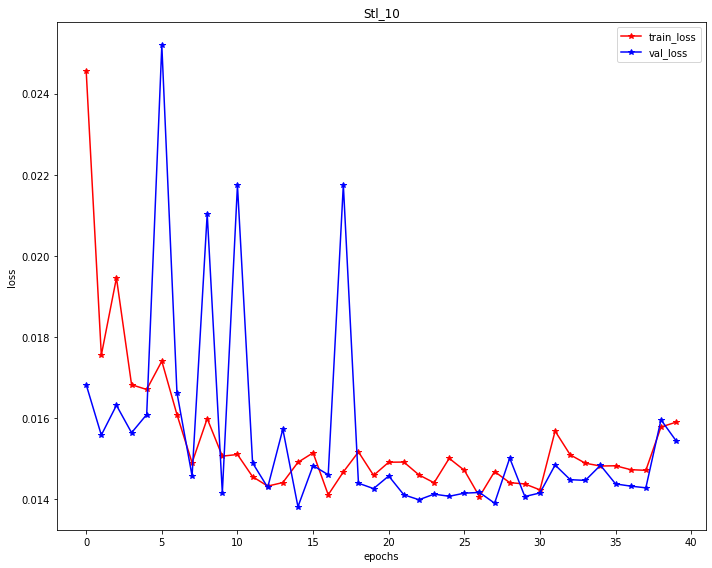

In [33]:
fig = plt.figure(figsize=(10,8))
plt.plot(train_loss_graph,'r-*')
plt.plot(val_loss_graph,'b-*')
plt.legend(['train_loss','val_loss'])
plt.title("Stl_10")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.tight_layout()
plt.show()

In [ ]:
int(4/2)

2

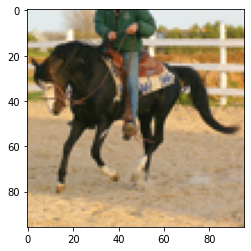

In [ ]:
plt.imshow(test_img[0].cpu().detach().numpy().transpose(1,2,0))

In [ ]:
summary(model,(3,96,96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 48, 48]             416
       BatchNorm2d-2           [-1, 32, 48, 48]              64
              ReLU-3           [-1, 32, 48, 48]               0
            Conv2d-4           [-1, 64, 24, 24]           8,256
       BatchNorm2d-5           [-1, 64, 24, 24]             128
              ReLU-6           [-1, 64, 24, 24]               0
            Conv2d-7          [-1, 128, 12, 12]          32,896
       BatchNorm2d-8          [-1, 128, 12, 12]             256
              ReLU-9          [-1, 128, 12, 12]               0
           Conv2d-10            [-1, 256, 6, 6]         131,328
      BatchNorm2d-11            [-1, 256, 6, 6]             512
             ReLU-12            [-1, 256, 6, 6]               0
          Flatten-13                 [-1, 9216]               0
        Unflatten-14            [-1, 25